In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import pandas as pd
import json

def custom_scoring_function(train_r2, test_r2):
    # Penalize overfitting and underfitting
    overfitting_penalty = abs(train_r2 - test_r2)
    
    # Reward higher R^2 scores
    r2_reward = test_r2
    
    # Combine the two aspects into a single score
    score = r2_reward - overfitting_penalty
    
    return [score, train_r2, test_r2]



with open(r'C:\Users\huy_c\OneDrive\Random_Forest_tree_results.json', 'r') as f:
    data = json.load(f)

result = {}
for key, value in data.items():
    r2_scores_train = value['r2_scores_train']
    r2_scores_test = value['r2_scores_test']
    selected_feature_indices = value['selected_feature_indices']
    max_scoring_result = 0
    selected_feature_indices = None
    for index, r2 in enumerate(r2_scores_train):
        max_scoring = (custom_scoring_function(r2, r2_scores_test[index]))
        if max_scoring[0] > max_scoring_result:
            max_scoring_result = max_scoring[0]
            max_results = max_scoring
            selected_feature_indices = value["selected_feature_indices"][index]
    result[key] = {
        'r2_scores_train': max_results[0],
        'r2_scores_test': max_results[1],
        'selected_feature_indices': selected_feature_indices
    }

# with open(r'Random_Forest_tree_best_models.json', 'w') as f:
#     json.dump(result, f, indent=4)

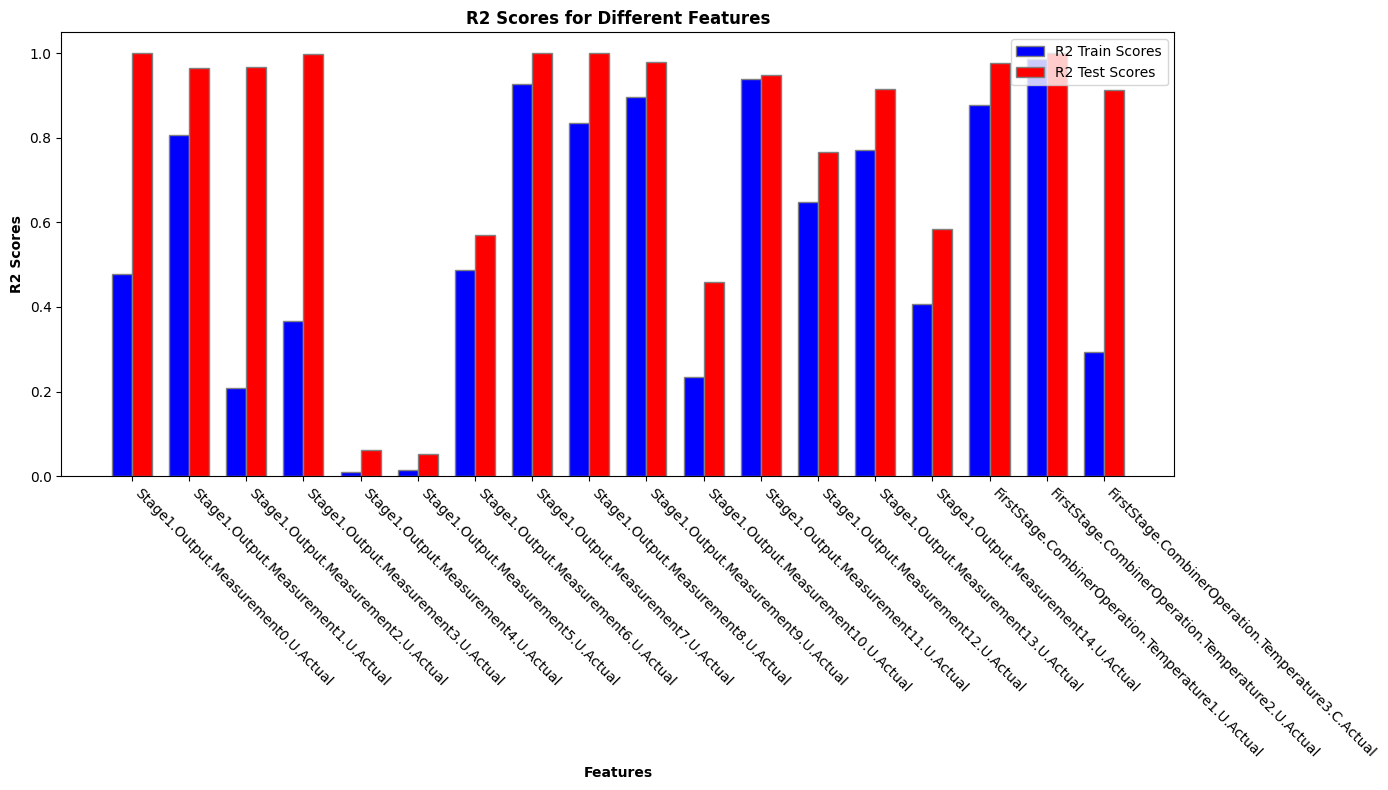

In [5]:
import matplotlib.pyplot as plt

# Assuming 'features' is a list of feature names
features = [key for key, value in result.items()]
r2_train_scores = [value["r2_scores_train"] for key, value in result.items()]
r2_test_scores = [value["r2_scores_test"] for key, value in result.items()]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on X-axis
r1 = np.arange(len(features))
r2 = [x + bar_width for x in r1]

# Increase the height of the chart by adjusting figsize
plt.figure(figsize=(14, 8))  # Adjust the height and width

# Plotting the bar chart
plt.bar(r1, r2_train_scores, color='b', width=bar_width, edgecolor='grey', label='R2 Train Scores')
plt.bar(r2, r2_test_scores, color='r', width=bar_width, edgecolor='grey', label='R2 Test Scores')

# Adding labels and title
plt.xlabel('Features', fontweight='bold')
plt.ylabel('R2 Scores', fontweight='bold')
plt.title('R2 Scores for Different Features', fontweight='bold')

# Rotating x-axis labels counterclockwise
plt.xticks([r + bar_width/2 for r in range(len(features))], features, rotation=-45, ha='left', fontsize=10)

# Adding legend
plt.legend()

# Adjusting layout to prevent label overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [7]:
target_values = [
    "Stage1.Output.Measurement1.U.Actual",
    "Stage1.Output.Measurement7.U.Actual",
    "Stage1.Output.Measurement11.U.Actual",
    "FirstStage.CombinerOperation.Temperature1.U.Actual",
    "FirstStage.CombinerOperation.Temperature2.U.Actual",
]

for key, value in result.items():
    if key in target_values:
        print(key, value)

Stage1.Output.Measurement1.U.Actual {'r2_scores_train': 0.8061854128352078, 'r2_scores_test': 0.964754386342657, 'selected_feature_indices': [0, 1, 2, 3, 5, 8, 9, 10, 11, 24, 25, 26, 27, 31, 32, 34]}
Stage1.Output.Measurement7.U.Actual {'r2_scores_train': 0.9276547372614127, 'r2_scores_test': 0.999991150095764, 'selected_feature_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]}
Stage1.Output.Measurement11.U.Actual {'r2_scores_train': 0.9390151853932495, 'r2_scores_test': 0.9486744453918435, 'selected_feature_indices': [12, 13, 14, 15, 25, 27, 33, 34]}
FirstStage.CombinerOperation.Temperature1.U.Actual {'r2_scores_train': 0.8787461392390495, 'r2_scores_test': 0.9776833880066743, 'selected_feature_indices': [0, 1, 2, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19, 21, 24, 25, 26, 27, 32, 34]}
FirstStage.CombinerOperation.Temperature2.U.Actual {'r2_scores_train': 0.986589686370272, 'r2_scores_test': 0.